# Regression Recap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_pickle("golden_data_dummy.pkl")
df2=pd.read_pickle("golden_data_not_dummy.pkl")
pd.set_option('display.max_columns', None)

In [4]:
df.head(3)

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.6,0,14500,2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,4.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [5]:
df.shape

(14990, 136)

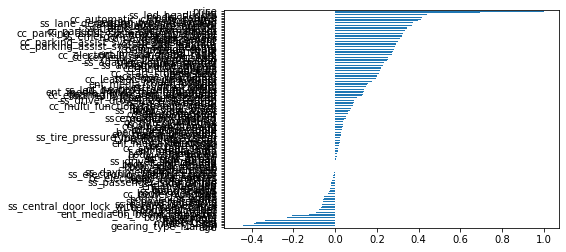

In [6]:
df.corr()['price'].sort_values().plot.barh()  #correlation ile hepsini goremeyecgimiz icin price ile filtreledik

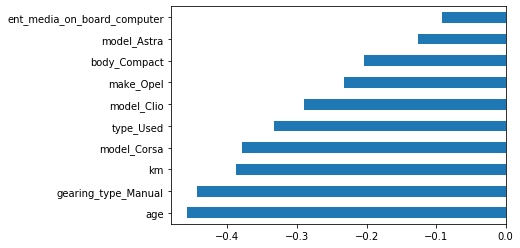

In [12]:
df.corr()['price'].sort_values().head(10).plot.barh()

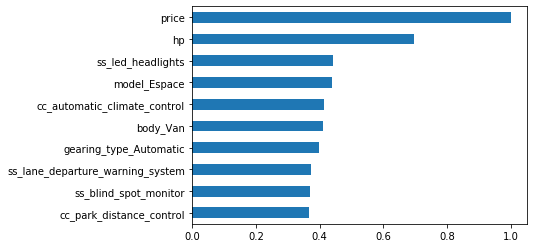

In [13]:
df.corr()['price'].sort_values().tail(10).plot.barh()

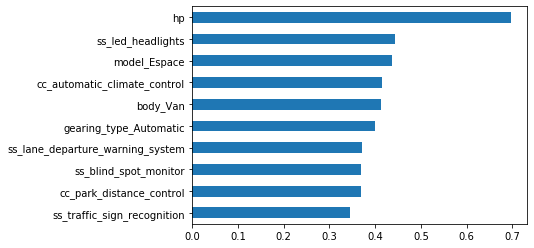

In [14]:
df.corr()['price'].sort_values().tail(11)[:-1].plot.barh();

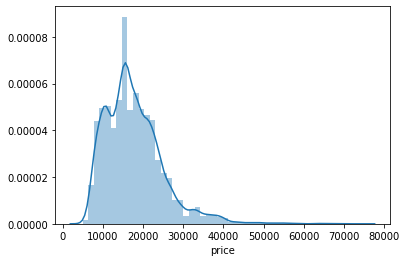

In [10]:
sns.distplot(df.price);

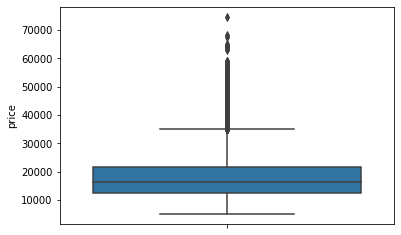

In [11]:
sns.boxplot(df.price, orient = 'v') # outlier da olsa, gercek veri - hata olmadigi icin silinmedi

In [15]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [17]:
X.shape

(14990, 135)

In [18]:
y.shape

(14990,)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

**1. Linear Regression**

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
type(lm)

sklearn.linear_model._base.LinearRegression

In [24]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lm.intercept_

12863.60208058797

In [26]:
lm.coef_  #her column icin bir coefficient uretildi

array([-1.07324683e+00,  1.00166983e+02, -3.66043273e-02, -4.31072316e+01,
       -2.11696074e+01,  2.90467232e+02,  1.47113286e+02, -4.26342916e+02,
       -2.45857390e+02,  1.44234756e+01, -2.93066855e+02, -1.16108907e+01,
       -1.62343964e+02, -2.49233364e+02,  3.14435352e+01, -8.25700143e+02,
       -1.68410690e+02, -6.39788701e+01, -2.52627947e+02, -3.36816275e+02,
       -2.21937795e+02,  6.50316165e+02,  7.88768070e+02,  5.31963200e+02,
        5.00522695e+02, -4.61395475e+02, -5.70148532e+02,  1.39061715e+02,
        1.34225323e+02,  2.11425107e+02,  1.86571437e+01, -4.13212783e+02,
        1.22899206e+02, -1.10716807e+02, -1.60110802e+03, -5.85909249e+02,
        1.44819775e+02,  9.04394102e+02, -7.91700474e+01, -8.95007277e+01,
        7.50148324e+00,  3.55613012e+02, -1.90184859e+02, -1.39196020e+03,
       -1.95752826e+02,  3.11567861e+02,  3.60531806e+01, -8.14980053e+01,
        3.51648412e+02,  3.35134852e+02, -4.18921989e+01,  2.67668171e+02,
       -2.30397964e+02,  

In [27]:
y_pred = lm.predict(X_test)

In [29]:
eval_metrics(y_test, y_pred)  # label'daki (y) degisimler %89 oraninda X feature'larla aciklabiliyor
# MAE = anlami - +/- 1672 euro civarinda prediction hatasi
# RMSE - 2 model sonucu karsilastirirken uygun olan RMSE"lerin karsilastirilmasi uygundur

r2_score: 0.8917673810996866 
 mae: 1672.3867626670994 
 mse: 5481554.524312932 
 rmse: 2341.271988538054


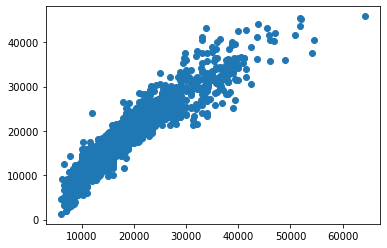

In [32]:
plt.scatter(y_test, y_pred);  # x ekseni gercek degerler

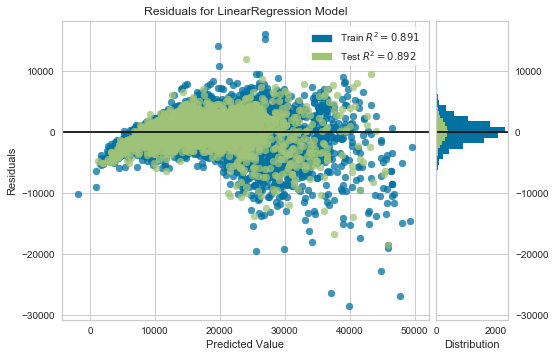

In [35]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();
# fiyat arttikca, residual - tahmin/gercek arasi fark artiyor. 30.000 euro'ya kadar hatalar fazla degil

In [36]:
my_dict = {'Actual': y_test, 'Pred': y_pred}

In [37]:
compare = pd.DataFrame(my_dict)

In [133]:
compare.sample(15)

,Actual,Pred
8991,7899,4672.377439
12615,32990,29005.687786
12229,20890,21887.321513
2610,21789,24070.212453
9133,8600,12367.993851
6044,10950,12627.702454
8982,7900,6310.584894
15166,21950,25545.030428
14196,9680,8295.015897
14686,11480,11516.994118


**Crossvalidation (CV)**

In [39]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=5)
cv_scores.mean()  # default r2_score hesapliyor

0.8853675809888788

In [40]:
cv_scores

array([0.88213508, 0.88024083, 0.89031947, 0.88202718, 0.89211535])

In [41]:
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, scoring = "neg_mean_squared_error", cv=10)
-accuraries.mean()

6037189.456297811

cv default r2_score kullanir - yukaridaki satirda mse kullanimi durumu

In [42]:
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, scoring = "neg_mean_absolute_error", cv=10)
-accuraries.mean()

1705.2377616167348

**Ridge Regression**

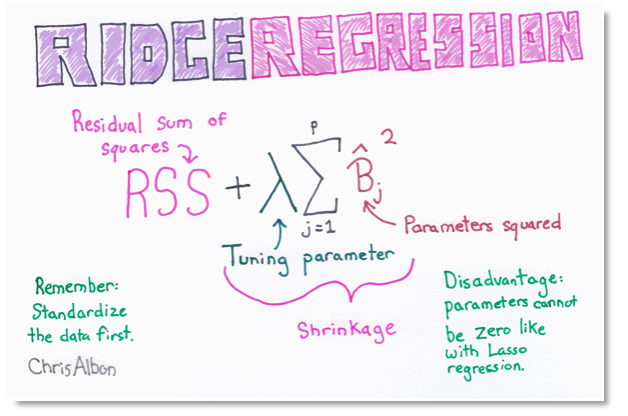

In [43]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

scale etmemisseniz normalize = True yapilir

In [44]:
ridge_model = Ridge(normalize = True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [45]:
eval_metrics(y_test, y_pred)

r2_score: 0.8390485500575235 
 mae: 1963.3528962238238 
 mse: 8151555.026488906 
 rmse: 2855.092822744806


In [46]:
dir(ridge_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_set_intercept',
 'alpha',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'max_iter',
 'n_iter_',
 'normalize',
 'predict',
 'random_state',
 'score',
 'set_params',
 'solver',
 'tol']

α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. 

In [47]:
ridge_model.alpha

1.0

In [48]:
type(y_pred)

numpy.ndarray

In [49]:
len(y_pred)

2998

In [50]:
# en iyi alpha'yi bulmak icin:
alpha_space = np.linspace(0.1, 20, 100)

In [51]:
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [52]:
ridgecv = RidgeCV(alphas = alpha_space, normalize = True, cv = 5) #ridge kendi CV fonksiyonu - alphas icindeki degerleri deneyecek 
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [53]:
ridgecv.alpha_  # en iyi alpha degerini verdi - ilk denenen

0.1

buldugumuz alpha degerini - 0.1- kullanarak tekrar egitecegiz

In [55]:
ridge_model = Ridge(alpha = 0.1, normalize = True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [56]:
eval_metrics(y_test, y_pred)

r2_score: 0.8908685496674182 
 mae: 1663.8811495596701 
 mse: 5527076.785108295 
 rmse: 2350.973582392685


farkli alpha'lar denenebilir

In [57]:
ridge_model = Ridge(alpha = 0.01, normalize = True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [58]:
eval_metrics(y_test, y_pred)

r2_score: 0.8920596063211058 
 mae: 1668.7977194129394 
 mse: 5466754.471418854 
 rmse: 2338.109165847235


alpha 0'a yaklastikca iyilesiyor - limitteyiz

**Lasso Regression**

In [59]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [60]:
lasso_model = Lasso(normalize = True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

In [61]:
eval_metrics(y_test, y_pred)

r2_score: 0.8840377602740636 
 mae: 1698.8273169126867 
 mse: 5873029.279690901 
 rmse: 2423.4333660513344


In [62]:
# Lasso icin de alpha value default 1 - bir optimizasyon yapabiliriz

In [63]:
lassocv = LassoCV(alphas = alpha_space, normalize = True, cv = 5) #lasso kendi CV fonksiyonu - alphas icindeki degerleri deneyecek 
lassocv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [64]:
lassocv.alpha_

0.1

yine 0.1 bulundu - BTW, still the min value

In [65]:
lasso_model = Lasso(alpha = 0.1, normalize = True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

In [66]:
eval_metrics(y_test, y_pred)

r2_score: 0.8917796626649902 
 mae: 1668.1568590125223 
 mse: 5480932.5115543045 
 rmse: 2341.139148268275


In [67]:
lasso_model = Lasso(alpha = 0.01, normalize = True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

In [68]:
eval_metrics(y_test, y_pred)

r2_score: 0.8918064884399045 
 mae: 1671.68877048965 
 mse: 5479573.892042517 
 rmse: 2340.8489682255276


Try without normalizing

In [69]:
lassocv = LassoCV(alphas = alpha_space, normalize = False, cv = 5) #lasso kendi CV fonksiyonu - alphas icindeki degerleri deneyecek 
lassocv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [70]:
lassocv.alpha_

1.9090909090909092

In [71]:
lasso_model = Lasso(alpha = 1.909, normalize = False)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

In [72]:
eval_metrics(y_test, y_pred)

r2_score: 0.8922276180551226 
 mae: 1669.6045252797799 
 mse: 5458245.340898914 
 rmse: 2336.2887965529676


a little better

Ridge coefficient'lari 0'a yaklastirir ama silmez

Lasso coefficient'lari silebilir  - bu feature'lari bulabilmek icin

In [74]:
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})

In [75]:
feature_coef.head()

,features,coef
0,displacement,-1.036499
1,hp,102.004007
2,km,-0.036668
3,ss_abs,-15.699341
4,ss_adaptive_cruise_control,0.000000


In [78]:
feature_coef.shape

(135, 2)

In [76]:
# ss adaptive cruise control gibi bazi feature'lari 0'lamis

In [77]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

109

135 feature 109'a inmis - thanks to Lasso

In [79]:
significant_features.shape

(109, 2)

In [80]:
lasso_model = Lasso(alpha = 50, normalize = False)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.874866834063786 
 mae: 1757.4373768685873 
 mse: 6337500.4582585115 
 rmse: 2517.4392660516187


In [81]:
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

42

alpha'yi cok arttirdim (50'ye), feature sayisi 50'ye inmesine ragmen r2_score'da dusme fazla degil 

In [83]:
significant_features.sort_values(by='coef', ascending = False)

,features,coef
99,model_Espace,4564.400983
90,make_Audi,3058.906037
130,type_Demonstration,1517.906139
59,cc_heads_up_display,1512.656699
22,ss_lane_departure_warning_system,739.336220
100,model_Insignia,688.665474
95,model_A3,677.004104
79,cc_seat_ventilation,632.044184
21,ss_led_headlights,615.370117
37,ent_media_digital_radio,532.907444


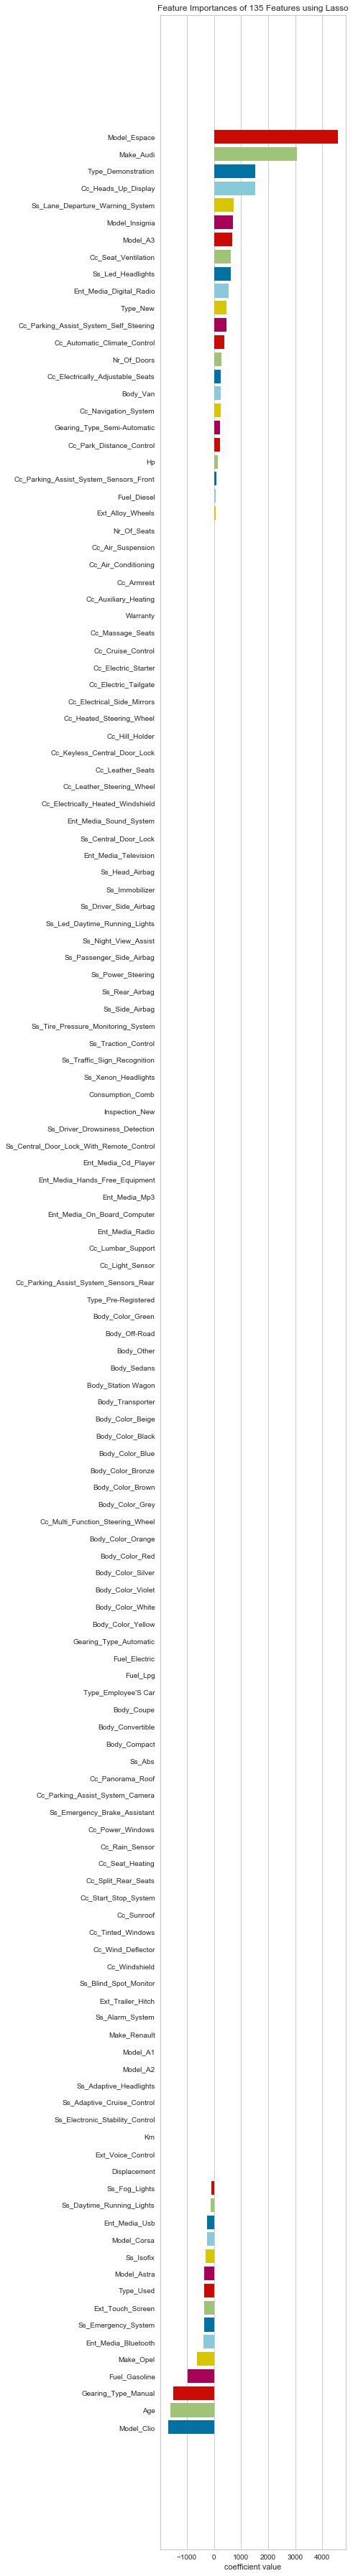

In [82]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(500, 3600))
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

**Random Forest Regressor**

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
rf_reg = RandomForestRegressor()

In [86]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [89]:
y_pred = rf_reg.predict(X_test)

In [90]:
eval_metrics(y_test, y_pred)

r2_score: 0.9549173674934983 
 mae: 860.4961214706904 
 mse: 2283257.2166766245 
 rmse: 1511.0450743365086


CV istersek

In [91]:
cv_scores = cross_val_score(estimator = rf_reg, X = X_train, y = y_train, cv =3)
cv_scores.mean()

0.9499767781509046

**RF Feature Importance**

In [94]:
rf_reg.feature_importances_

array([1.07881871e-02, 4.61904136e-01, 6.92995413e-02, 2.11303393e-04,
       7.15592586e-04, 3.56612554e-04, 7.11749849e-04, 4.26931532e-04,
       2.95911018e-04, 2.33001489e-04, 3.93501492e-04, 1.33557603e-04,
       2.85541078e-04, 3.25162776e-04, 4.46570199e-04, 2.16622404e-04,
       5.85781643e-04, 2.19175342e-04, 4.59365796e-04, 8.54169608e-04,
       4.47029048e-04, 1.92734531e-03, 5.22042363e-04, 4.57164900e-05,
       2.24315156e-04, 1.74311524e-03, 2.05432431e-04, 2.90216726e-04,
       4.76795760e-04, 3.58009283e-04, 2.75972798e-04, 5.85453258e-04,
       7.59248163e-03, 3.67856867e-04, 1.90317483e-01, 3.64143752e-03,
       5.44597821e-04, 5.55446711e-04, 4.94357704e-04, 4.19086584e-04,
       3.55054670e-04, 7.98038058e-04, 5.80207212e-04, 3.34636057e-05,
       5.67046440e-04, 1.09849453e-03, 2.80440781e-03, 7.56211999e-04,
       2.17221939e-04, 9.11701019e-05, 5.62220058e-04, 6.73027349e-04,
       8.07166247e-05, 4.15221687e-04, 0.00000000e+00, 4.69686351e-04,
      

In [95]:
importance = pd.DataFrame({'importance':rf_reg.feature_importances_},
                          index = X_train.columns)  # feature_importance array'i DF yaptik

In [96]:
importance.sort_values(by="importance", ascending = False).head(10)  #importance'a gore siralayip usttekiler incelenir

,importance
hp,0.461904
age,0.190317
km,0.069300
model_Espace,0.060384
make_Audi,0.060382
gearing_type_Manual,0.019003
cc_park_distance_control,0.017824
displacement,0.010788
model_Astra,0.010458
model_A3,0.008914


In [134]:
importance.sort_values(by="importance", ascending = False).tail(10)

,importance
body_Off-Road,0.000036
ent_media_television,0.000033
body_Transporter,0.000032
body_Coupe,0.000017
body_color_Violet,0.000012
cc_leather_seats,0.000009
body_color_Bronze,0.000005
fuel_electric,0.000002
cc_windshield,0.000001
cc_electric_starter,0.000000


In [97]:
df2.head(3) # 4 onemli parametre get_dummies yapilmamis durumda bir DF

,displacement,make,model,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,body,body_color,gearing_type,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,fuel,nr_of_doors,nr_of_seats,type,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control
0,1422.0,Audi,A1,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,Sedans,Black,Automatic,1,15770,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,diesel,5.0,5.0,Used,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1798.0,Audi,A1,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.6,Sedans,Red,Automatic,0,14500,2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,gasoline,3.0,4.0,Used,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1598.0,Audi,A1,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,Sedans,Black,Automatic,0,14640,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,diesel,4.0,4.0,Used,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [98]:
df2.shape

(14994, 98)

**Feature Selection with RF**

In [99]:
new_list = ['age', 'model', 'hp', 'km']  #feature selection olarak bu 4 parametre secildi - importance'a gore

In [101]:
X = df2[new_list]
y = df2['price']
X = pd.get_dummies(X)

df kullanamyiz cunku get_dummies yapilmis - bize model'in normal hali lazim

In [103]:
X.shape # 4 column 11'e cikti

(14994, 11)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [105]:
rf_reg = RandomForestRegressor()

In [106]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [107]:
y_pred = rf_reg.predict(X_test)

In [108]:
eval_metrics(y_test, y_pred)  # sadece 4 feature'la (get_dummies sonrasi 11 adet) %90'i gectik

r2_score: 0.900269913538237 
 mae: 1461.1172181819084 
 mse: 5372484.185354668 
 rmse: 2317.8619858297575


CV yapalim

In [111]:
accuraries = cross_val_score(estimator=rf_reg, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8932428971635129

**RF Model Tuning**

In [112]:
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

In [113]:
rf_cv_model = GridSearchCV(rf_reg, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.9min finished


In [115]:
rf_cv_model.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_split': 4,
 'n_estimators': 100}

In [116]:
rf_tuned = RandomForestRegressor(max_depth = 7,
                                max_features = 6,
                                min_samples_split = 4,
                                 n_estimators = 100)
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [117]:
y_pred = rf_tuned.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8979307872651251 
 mae: 1603.984832125255 
 mse: 5498493.490627453 
 rmse: 2344.8866690370032


In [119]:
accuraries = cross_val_score(estimator=rf_tuned, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8905909441311387

max-depth / features olmadan????

In [120]:
rf_tuned_2 = RandomForestRegressor(max_features = 6,
                                min_samples_split = 4,
                                 n_estimators = 100)
rf_tuned_2.fit(X_train, y_train)    # max feature???? cok degistirilmemeli

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [121]:
y_pred = rf_tuned_2.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9056025855450395 
 mae: 1445.7949863634274 
 mse: 5085211.838175725 
 rmse: 2255.041427152886


In [122]:
accuraries = cross_val_score(estimator=rf_tuned, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8909888974308195

In [123]:
import pickle 
pickle.dump(rf_tuned_2, open('rf_tuned_2', 'wb'))

In [125]:
my_model = pickle.load(open('rf_tuned_2', 'rb'))

**XGBOOST Regressor**

In [126]:
# tekrar df'e geri dondu
X=df.drop(['price'], axis=1)
y=df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [127]:
import xgboost

In [128]:
model_xg = xgboost.XGBRegressor()
model_xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [129]:
y_pred = model_xg.predict(X_test)

In [130]:
eval_metrics(y_test, y_pred)

r2_score: 0.9564463812839813 
 mae: 927.7647673318671 
 mse: 2199913.203365489 
 rmse: 1483.2104379910118


**using 4 columns**

In [131]:
new_list = ['age', 'model', 'hp', 'km'] 

In [135]:
X=df2[new_list]
y=df2['price']
X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [136]:
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [137]:
y_pred = model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9154273169161891 
 mae: 1428.8015562479159 
 mse: 4555951.152764643 
 rmse: 2134.4674166556497


**GridSearch with XGBOOST**

In [138]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [139]:
from sklearn.model_selection import GridSearchCV
xgb_cv_model  = GridSearchCV(model,xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  1.4min finished


In [142]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}

In [143]:
xgb_tuned = xgboost.XGBRegressor(subsample = 1, 
                         learning_rate = 0.1, 
                         max_depth = 7, 
                         n_estimators = 100).fit(X_train, y_train)

In [144]:
y_pred = xgb_tuned.predict(X_test)
eval_metrics(y_test,y_pred)

r2_score: 0.9161708348854484 
 mae: 1428.496445755356 
 mse: 4515897.657645055 
 rmse: 2125.0641537716115
